## Intro till Pandas
* Series object
* Dataframe object

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = dict(AI = 25, NET=30, APP = 27, JAVA = 23)
series = pd.Series(data=data)
series

AI      25
NET     30
APP     27
JAVA    23
dtype: int64

In [1]:
#data = dict(AI = 25, NET=30, APP = 27, JAVA = "23")
#series = pd.Series(data=data)
#series

In [3]:
print(f"series: [0] = {series[0]}")
print(f"series: [-1] = {series[-1]}")

# extract keys
print(f"series.keys: {series.keys()}")
print(f"series.keys: {series.keys()[-2]}")

series: [0] = 25
series: [-1] = 23
series.keys: Index(['AI', 'NET', 'APP', 'JAVA'], dtype='object')
series.keys: APP


## Dataframe



In [4]:
df= pd.DataFrame(series)
df

,0
AI,25
NET,30
APP,27
JAVA,23


In [5]:
df = pd.DataFrame(series, columns=("Number students",))
df

,Number students
AI,25
NET,30
APP,27
JAVA,23


In [6]:
languages = pd.Series(dict(AI="Python",NET = "C#",APP = "hej", JAVA = "blabla"))
df = pd.DataFrame({"Students":series,"Languages":languages})
df

,Students,Languages
AI,25,Python
NET,30,C#
APP,27,hej
JAVA,23,blabla


In [7]:
df.index #komma åt index

Index(['AI', 'NET', 'APP', 'JAVA'], dtype='object')

## Data selection

In [8]:
df.Students #gets a series with attribute approach

AI      25
NET     30
APP     27
JAVA    23
Name: Students, dtype: int64

In [9]:
df["Students"] # gets a Series with dictionary-keys approach

AI      25
NET     30
APP     27
JAVA    23
Name: Students, dtype: int64

In [10]:
#multiple columns
df[["Languages","Students"]]

,Languages,Students
AI,Python,25
NET,C#,30
APP,hej,27
JAVA,blabla,23


In [11]:
# wants to get all rows > 24 students
df["Students"] > 24

large_groups = df[df["Students"] > 24] #Picked out all the rows that are True


Text(0.5, 1.0, 'Antal studenter per klass')

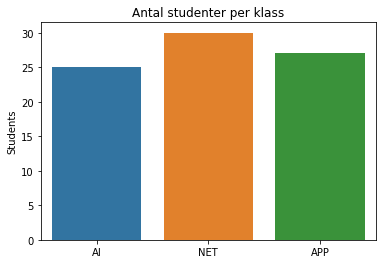

In [12]:
sns.barplot(data=large_groups, x= large_groups.index, y = "Students")
plt.title("Antal studenter per klass")

In [98]:
#Read Excel

calories = pd.read_excel("calories.xlsx")
calories
calories.head(2)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ


In [99]:
calories.iloc[3:8]

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ


In [100]:
#calories.info()
calories.describe() #Gives statistics on data

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [101]:
calories["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [102]:
calories.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [103]:
calories["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning

- Change column names
- Convert String to Int
- Separate liquids and solids

In [104]:
calories = calories.rename(dict(Cals_per100grams = "Calories", per100grams = "per100"), axis = "columns")

In [105]:
calories["Calories"] = calories["Calories"].str[:-3].astype(int)
calories.head(3)

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ


In [112]:
calories["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [117]:
solids = calories[calories["per100"] == "100g"]
liquids = calories[calories["per100"] == "100g"]


## Find top 5 categories with highest calories

In [127]:
solids_top5 = solids.sort_values(by = "Calories", ascending= False).head(5)
solids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [128]:
liquids_top_5 = liquids.sort_values(by="Calories",ascending=False).head()
liquids_top_5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


<AxesSubplot:xlabel='FoodItem', ylabel='Calories'>

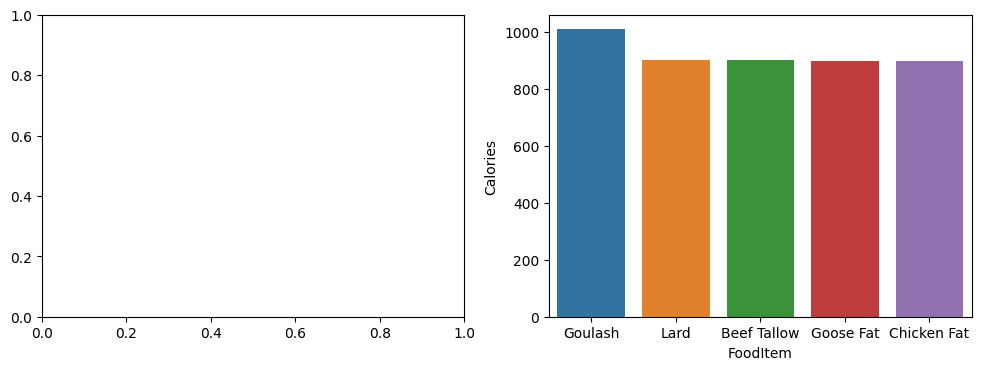

In [148]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, dpi = 100, figsize = (12,4))
sns.barplot(data=solids_top5,x="FoodItem", y="Calories")
sns.barplot(data=liquids_top_5,x="FoodItem", y="Calories")